In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

In [2]:
protect = pd.read_csv("data.csv")

In [3]:
# protect.head() - commented because cannot show the database

In [4]:
protect[1: ].isna().sum()

SYS_LOC_CODE           0
obdiffcard          1856
obdiffhbp           1856
obdiffkidney        1856
obdiffliver         1856
RACE__1                0
RACE__2                0
RACE__3                0
RACE__4                0
RACE__5                0
RACE__6                0
RACE__97               0
RACE__888              0
RACE__999              0
race97              1842
hisp                 128
smkever                3
alcdays             1060
marijuse               4
druguse               10
fvcurrht_foot         59
fvcurrht_inch         70
wtprepreg             12
prembirthnum         433
pregnum                6
prevpreeclmp         848
preveclmp            849
currpreeclmp          25
curreclmp             23
currhd                27
currgd                24
prevhyp              235
preghyp_durante      237
prevdiab             235
pregdiab_durante     236
preglup_durante      235
prevlup              233
tvcurrpreeclmp       153
tvcurreclmp          153
tvcurrgd             155


In [5]:
total = protect.isna().sum().sort_values(ascending=False)
percent = ((protect.isna().sum()/protect.isna().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
obdiffhbp,1857,99.892415
obdiffkidney,1857,99.892415
obdiffliver,1857,99.892415
obdiffcard,1857,99.892415
vitdfreq,1849,99.462076
race97,1843,99.139322
calfreq,1832,98.547606
pppretlabw,1823,98.063475
ppinduct,1777,95.589026
pppreeclampsia,1753,94.298010


In [6]:
#create new column for pre-eclampsia combining all pre-eclampsia data. Drop the rows that are null in the new column
#if currpreeclmp or tvcurrpreeclmp or pppreeclampsia == 1 then total_preeclampsia = 1 else if they are 0 then zero, if all are null, then null.
pd.to_numeric(protect['currpreeclmp'])
pd.to_numeric(protect['tvcurrpreeclmp'])
pd.to_numeric(protect['pppreeclampsia'])

protect.fillna(value = 9999, inplace= True)

In [7]:
conditions = [((protect['currpreeclmp'].astype(int, errors = 'ignore') == 1) | (protect['tvcurrpreeclmp'].astype(int, errors = 'ignore') == 1) | (protect['pppreeclampsia'].astype(int, errors = 'ignore') == 1)),
              ((protect['currpreeclmp'].astype(int, errors = 'ignore') == 0) | (protect['tvcurrpreeclmp'].astype(int, errors = 'ignore') == 0) | (protect['pppreeclampsia'].astype(int, errors = 'ignore') == 0)),
              ((protect['currpreeclmp']== 9999) | (protect['tvcurrpreeclmp'] == 9999) | (protect['pppreeclampsia'] == 9999))]
values = [1,0,9999]
protect["total_preeclampsia"] = np.select(conditions, values)
#display(protect) cannot display

0       1814
1         35
9999      10
Name: total_preeclampsia, dtype: int64

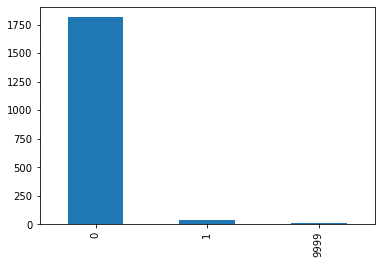

In [8]:
pd.value_counts(protect['total_preeclampsia']).plot.bar()
protect['total_preeclampsia'].value_counts()

In [9]:
protect.replace(9999,np.NaN, inplace = True)
#protect.head()

In [10]:
protect_new = protect.dropna(axis=1, thresh= 0.9 * len(protect),inplace=False)
protect_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1859 entries, 0 to 1858
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SYS_LOC_CODE        1859 non-null   int64  
 1   RACE__1             1859 non-null   int64  
 2   RACE__2             1859 non-null   int64  
 3   RACE__3             1859 non-null   int64  
 4   RACE__4             1859 non-null   int64  
 5   RACE__5             1859 non-null   int64  
 6   RACE__6             1859 non-null   int64  
 7   RACE__97            1859 non-null   int64  
 8   RACE__888           1859 non-null   int64  
 9   RACE__999           1859 non-null   int64  
 10  hisp                1731 non-null   float64
 11  smkever             1856 non-null   float64
 12  marijuse            1855 non-null   float64
 13  druguse             1849 non-null   float64
 14  fvcurrht_foot       1800 non-null   float64
 15  fvcurrht_inch       1789 non-null   float64
 16  wtprep

In [11]:
df = protect

In [12]:
df = df.drop(['SYS_LOC_CODE','RACE__999','RACE__888','ppinduct','pptypelabor','race97','obdiffcard','obdiffhbp','obdiffkidney', 'obdiffliver','vitdfreq','calfreq','pppretlabw','pppreeclampsia'], axis=1)

In [13]:
df.columns

Index(['RACE__1', 'RACE__2', 'RACE__3', 'RACE__4', 'RACE__5', 'RACE__6',
       'RACE__97', 'hisp', 'smkever', 'alcdays', 'marijuse', 'druguse',
       'fvcurrht_foot', 'fvcurrht_inch', 'wtprepreg', 'prembirthnum',
       'pregnum', 'prevpreeclmp', 'preveclmp', 'currpreeclmp', 'curreclmp',
       'currhd', 'currgd', 'prevhyp', 'preghyp_durante', 'prevdiab',
       'pregdiab_durante', 'preglup_durante', 'prevlup', 'tvcurrpreeclmp',
       'tvcurreclmp', 'tvcurrgd', 'ivf', 'MULTIFETUS', 'vitd', 'cal',
       'total_preeclampsia'],
      dtype='object')

#### IMPUTATION

In [14]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [15]:
df['marijuse'] = imputer.fit_transform(np.array(df['marijuse']).reshape(-1,1))

In [16]:
df['hisp'] = imputer.fit_transform(np.array(df['hisp']).reshape(-1,1))

In [17]:
df['smkever'] = imputer.fit_transform(np.array(df['smkever']).reshape(-1,1))

In [18]:
df['alcdays'] = imputer.fit_transform(np.array(df['alcdays']).reshape(-1,1))

In [19]:
df['druguse'] = imputer.fit_transform(np.array(df['druguse']).reshape(-1,1))

In [20]:
df['fvcurrht_foot'] = df['fvcurrht_foot'].fillna(df['fvcurrht_foot'].mean())

In [21]:
df['fvcurrht_inch'] = df['fvcurrht_inch'].fillna(df['fvcurrht_inch'].mean())

In [22]:
df['fvcurrht_inch'] = (df['fvcurrht_inch']-df['fvcurrht_inch'].min())/(df['fvcurrht_inch'].max()-df['fvcurrht_inch'].min())

In [23]:
df['fvcurrht'] = df['fvcurrht_foot'] + df['fvcurrht_inch']

In [24]:
df = df.drop(['fvcurrht_foot','fvcurrht_inch'], axis=1)

In [25]:
df['wtprepreg'] = df['wtprepreg'].fillna(df['wtprepreg'].mean())

In [26]:
df['prembirthnum'] = imputer.fit_transform(np.array(df['prembirthnum']).reshape(-1,1))

In [27]:
df['pregnum'] = imputer.fit_transform(np.array(df['pregnum']).reshape(-1,1))
df['prevpreeclmp'] = imputer.fit_transform(np.array(df['prevpreeclmp']).reshape(-1,1))
df['preveclmp'] = imputer.fit_transform(np.array(df['preveclmp']).reshape(-1,1))
df['currpreeclmp'] = imputer.fit_transform(np.array(df['currpreeclmp']).reshape(-1,1))
df['curreclmp'] = imputer.fit_transform(np.array(df['curreclmp']).reshape(-1,1))
df['currhd'] = imputer.fit_transform(np.array(df['currhd']).reshape(-1,1))
df['currgd'] = imputer.fit_transform(np.array(df['currgd']).reshape(-1,1))
df['prevhyp'] = imputer.fit_transform(np.array(df['prevhyp']).reshape(-1,1))
df['preghyp_durante'] = imputer.fit_transform(np.array(df['preghyp_durante']).reshape(-1,1))
df['prevdiab']= imputer.fit_transform(np.array(df['prevdiab']).reshape(-1,1))
df['pregdiab_durante']= imputer.fit_transform(np.array(df['pregdiab_durante']).reshape(-1,1))
df['preglup_durante']= imputer.fit_transform(np.array(df['preglup_durante']).reshape(-1,1))
df['prevlup'] = imputer.fit_transform(np.array(df['prevlup']).reshape(-1,1))
df['tvcurrpreeclmp']= imputer.fit_transform(np.array(df['tvcurrpreeclmp']).reshape(-1,1))
df['tvcurreclmp']= imputer.fit_transform(np.array(df['tvcurreclmp']).reshape(-1,1))
df['tvcurrgd'] = imputer.fit_transform(np.array(df['tvcurrgd']).reshape(-1,1))
df['ivf'] = imputer.fit_transform(np.array(df['ivf']).reshape(-1,1))
df['MULTIFETUS'] = imputer.fit_transform(np.array(df['MULTIFETUS']).reshape(-1,1))
df['vitd'] = imputer.fit_transform(np.array(df['vitd']).reshape(-1,1))
df['cal'] = imputer.fit_transform(np.array(df['cal']).reshape(-1,1))
df['total_preeclampsia'] = imputer.fit_transform(np.array(df['total_preeclampsia']).reshape(-1,1))

In [28]:
df.loc[df['total_preeclampsia'] <=0.5, 'total_preeclampsia'] = 0

In [29]:
pd.value_counts(df['total_preeclampsia'])

0.0    1824
1.0      35
Name: total_preeclampsia, dtype: int64

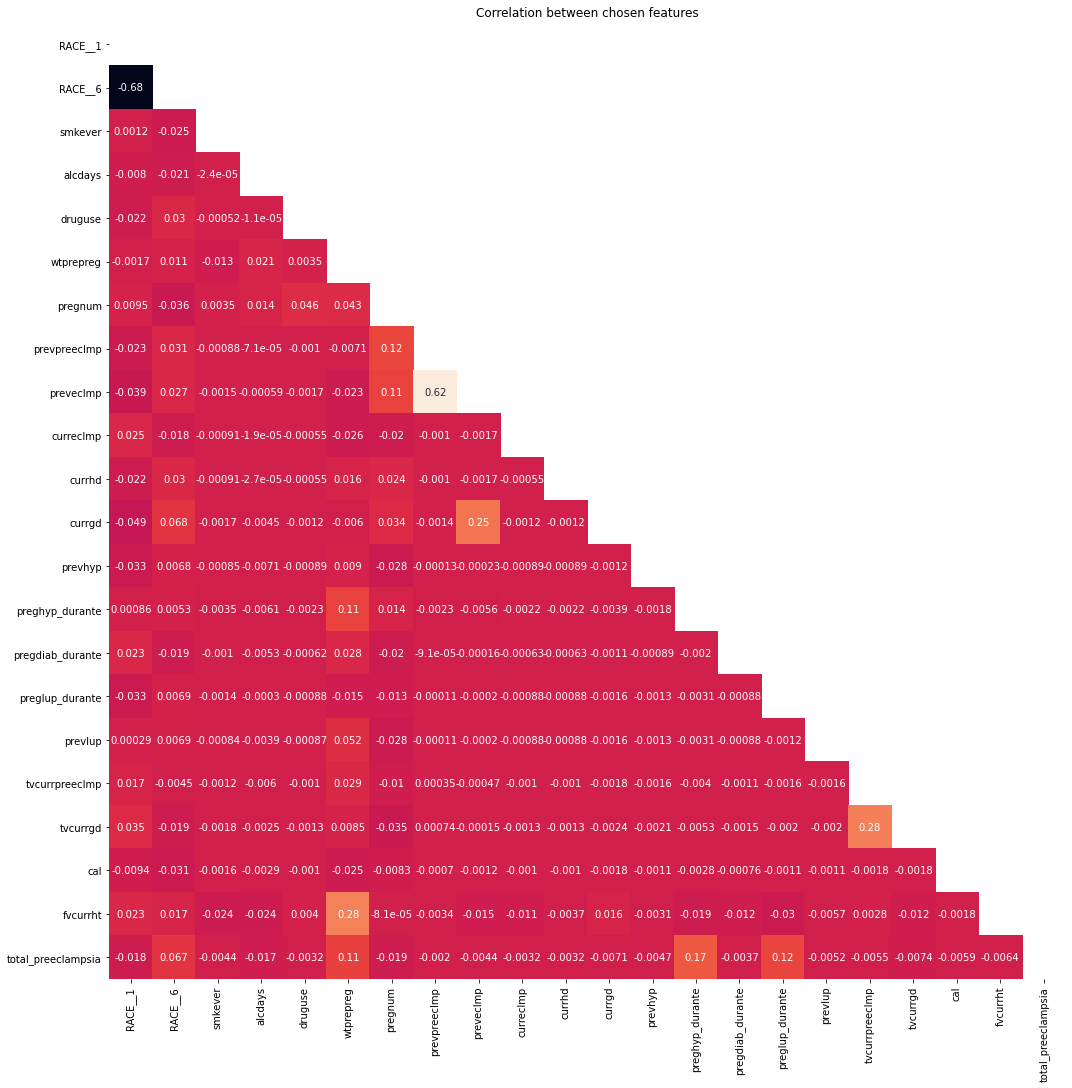

In [30]:
corr_matrix = df[['RACE__1', 'RACE__6', 'smkever', 'alcdays', 'druguse', 'wtprepreg',
       'pregnum', 'prevpreeclmp', 'preveclmp', 'curreclmp', 'currhd', 'currgd',
       'prevhyp', 'preghyp_durante', 'pregdiab_durante', 'preglup_durante',
       'prevlup', 'tvcurrpreeclmp', 'tvcurrgd', 'cal', 'fvcurrht', 'total_preeclampsia']].corr()  # get correlation matrix
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))  # upper triangle mask

# plot
plt.figure(figsize = (15, 15))
sns.heatmap(corr_matrix, mask = mask, cbar = False, annot = True)
plt.tight_layout()
#plt.savefig(os.getcwd() + '/Graphs/EDA/heatmap')
plt.title("Correlation between chosen features")
plt.show()
plt.close()

In [31]:
for i in df.columns:
  if(df[i].isnull().values.any()):
    print(i)
#just to check whether there are still any NA values

#### BOOTSTRAPPING

In [32]:
'''
function that takes in a dataframe, the column based on which to do bootstrapping an a max value 
which is the number of samples needed in each class of the column given

returns the dataframe with upsampled data
'''

def bootstrap_column(df, colname, max_size = 500):
    lst = []
    for class_index, group in tqdm(df.groupby(str(colname))):
        if len(group) > max_size:
            lst.append(group.sample(max_size, replace=False))
        else:
            lst.append(group.sample(max_size, replace = True))
    return pd.concat(lst).reset_index(drop = True)

In [33]:
df1 = bootstrap_column(df,'total_preeclampsia', 1824)

In [34]:
pd.value_counts(df1['total_preeclampsia'])

0.0    1824
1.0    1824
Name: total_preeclampsia, dtype: int64

C:\Users\chopr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Label distribution before bootstrapping')

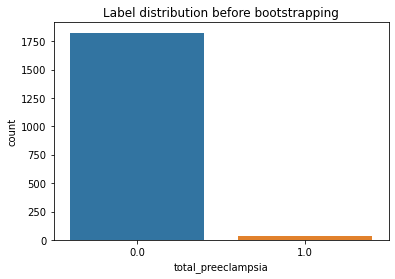

In [35]:
sns.countplot(df['total_preeclampsia'])
plt.title("Label distribution before bootstrapping")

C:\Users\chopr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Label distribution after bootstrapping')

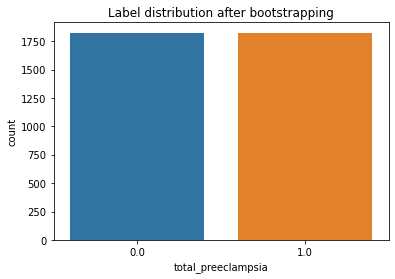

In [36]:
sns.countplot(df1['total_preeclampsia'])
plt.title("Label distribution after bootstrapping")

#### TRAIN TEST SPLITTING AND FEATURE SELECTION

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
train_df, test_df = train_test_split(df1, test_size=0.2, random_state = 9)

In [39]:
train_x = train_df[['RACE__1', 'RACE__2', 'RACE__3', 'RACE__4', 'RACE__5', 'RACE__6',
       'RACE__97', 'hisp', 'smkever', 'alcdays', 'marijuse', 'druguse',
       'wtprepreg', 'prembirthnum', 'pregnum', 'prevpreeclmp', 'preveclmp',
       'currpreeclmp', 'curreclmp', 'currhd', 'currgd', 'prevhyp',
       'preghyp_durante', 'prevdiab', 'pregdiab_durante', 'preglup_durante',
       'prevlup', 'tvcurrpreeclmp', 'tvcurreclmp', 'tvcurrgd', 'ivf',
       'MULTIFETUS', 'vitd', 'cal', 'fvcurrht']]

train_y = train_df[['total_preeclampsia']]

In [40]:
test_x = test_df[['RACE__1', 'RACE__2', 'RACE__3', 'RACE__4', 'RACE__5', 'RACE__6',
       'RACE__97', 'hisp', 'smkever', 'alcdays', 'marijuse', 'druguse',
       'wtprepreg', 'prembirthnum', 'pregnum', 'prevpreeclmp', 'preveclmp',
       'currpreeclmp', 'curreclmp', 'currhd', 'currgd', 'prevhyp',
       'preghyp_durante', 'prevdiab', 'pregdiab_durante', 'preglup_durante',
       'prevlup', 'tvcurrpreeclmp', 'tvcurreclmp', 'tvcurrgd', 'ivf',
       'MULTIFETUS', 'vitd', 'cal', 'fvcurrht']]

test_y = test_df[['total_preeclampsia']]

In [41]:
modified_train_x = train_x[['RACE__1', 'RACE__6', 'smkever', 'alcdays', 'druguse', 'wtprepreg',
       'pregnum', 'prevpreeclmp', 'preveclmp', 'curreclmp', 'currhd', 'currgd',
       'prevhyp', 'preghyp_durante', 'pregdiab_durante', 'preglup_durante',
       'prevlup', 'tvcurrpreeclmp', 'tvcurrgd', 'cal', 'fvcurrht']]
modified_train_y = train_y[['total_preeclampsia']]

modified_test_x = test_x[['RACE__1', 'RACE__6', 'smkever', 'alcdays', 'druguse', 'wtprepreg',
       'pregnum', 'prevpreeclmp', 'preveclmp', 'curreclmp', 'currhd', 'currgd',
       'prevhyp', 'preghyp_durante', 'pregdiab_durante', 'preglup_durante',
       'prevlup', 'tvcurrpreeclmp', 'tvcurrgd', 'cal', 'fvcurrht']]
modified_test_y = test_y[['total_preeclampsia']]

#### Fitting logreg with bootstrapping

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
mdl2 = LogisticRegression(penalty='l1', solver='liblinear')
mdl2.fit(modified_train_x, modified_train_y)

C:\Users\chopr\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(penalty='l1', solver='liblinear')

In [44]:
mdl2.score(modified_test_x, modified_test_y)

0.7712328767123288

#### model evaluation on testing set

In [45]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

Confusion Matrix :
 [[278 104]
 [ 63 285]]


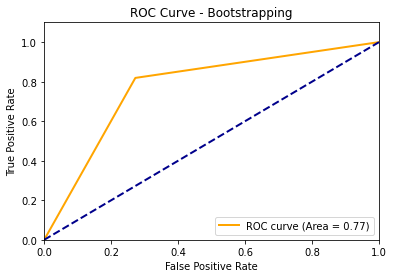

In [46]:
preds_before=mdl2.predict(modified_test_x)
actual_y_before = modified_test_y

confusion_mat = confusion_matrix(actual_y_before,preds_before)
print("Confusion Matrix :\n",confusion_mat)
false_positive_rate, true_positive_rate, _ = roc_curve(actual_y_before,preds_before)
area_under_curve = auc(false_positive_rate,true_positive_rate)

plt.plot(false_positive_rate, true_positive_rate, color='orange',lw=2, label='ROC curve (Area = %0.2f)' % area_under_curve)
plt.plot([0, 1], [0, 1], color='darkblue', lw=2, linestyle='--')
plt.title('ROC Curve - Bootstrapping')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.legend(loc="lower right")
plt.show()

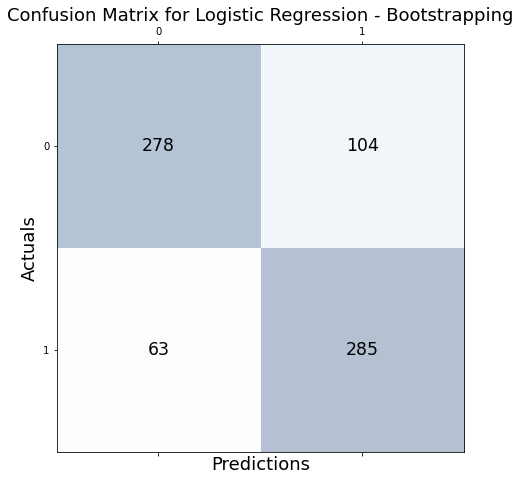

In [47]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(confusion_mat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confusion_mat.shape[0]):
    for j in range(confusion_mat.shape[1]):
        ax.text(x=j, y=i,s=confusion_mat[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix for Logistic Regression - Bootstrapping', fontsize=18)
plt.show()